# IMDB Films By Actor
Source: https://www.kaggle.com/darinhawley/imdb-films-by-actor-for-10k-actors

## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [10]:
dataset=pd.read_csv("Data_Imdb-Films-By-Actor_Original.csv")
dataset

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664
...,...,...,...,...,...,...,...
191868,Roman Griffin Davis,nm9877392,Jojo Rabbit,2019,310904,7.9,tt2584384
191869,Lexi Rabe,nm9962642,Silk Road,2021,2050,5.9,tt7937254
191870,Lexi Rabe,nm9962642,Avengers: Endgame,2019,849079,8.4,tt4154796
191871,Lexi Rabe,nm9962642,Godzilla: King of the Monsters,2019,146737,6.0,tt3741700


#### Copying dataset to be able to revert to original dataset quickly if necessary

In [11]:
df = dataset.copy()
df

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664
...,...,...,...,...,...,...,...
191868,Roman Griffin Davis,nm9877392,Jojo Rabbit,2019,310904,7.9,tt2584384
191869,Lexi Rabe,nm9962642,Silk Road,2021,2050,5.9,tt7937254
191870,Lexi Rabe,nm9962642,Avengers: Endgame,2019,849079,8.4,tt4154796
191871,Lexi Rabe,nm9962642,Godzilla: King of the Monsters,2019,146737,6.0,tt3741700


#### Checking if there is something to clean

In [12]:
df.isna().sum()

Actor      0
ActorID    0
Film       0
Year       0
Votes      0
Rating     0
FilmID     0
dtype: int64

## Basic statistics

In [13]:
df.describe()

,Year,Votes,Rating
count,191873.000000,1.918730e+05,191873.000000
mean,1997.952948,5.041857e+04,5.975764
std,19.839797,1.392857e+05,1.094434
min,1914.000000,1.000000e+02,1.000000
25%,1990.000000,6.690000e+02,5.400000
50%,2004.000000,3.906000e+03,6.100000
75%,2013.000000,3.213200e+04,6.700000
max,2021.000000,2.371548e+06,9.300000


#### Distribution of number of votes

In [14]:
film_to_votes=df[["Film", "Votes"]].drop_duplicates()
film_to_votes

,Film,Votes
0,Ghost Story,7731
1,The Purple Taxi,533
2,The Amazing Dobermans,369
3,The Towering Inferno,39888
4,Midas Run,123
...,...,...
191842,The Running Actress,102
191843,The Treacherous,1195
191848,Gunjan Saxena: The Kargil Girl,24696
191849,Ghost Stories,4485


(0.0, 2519735.619196354)

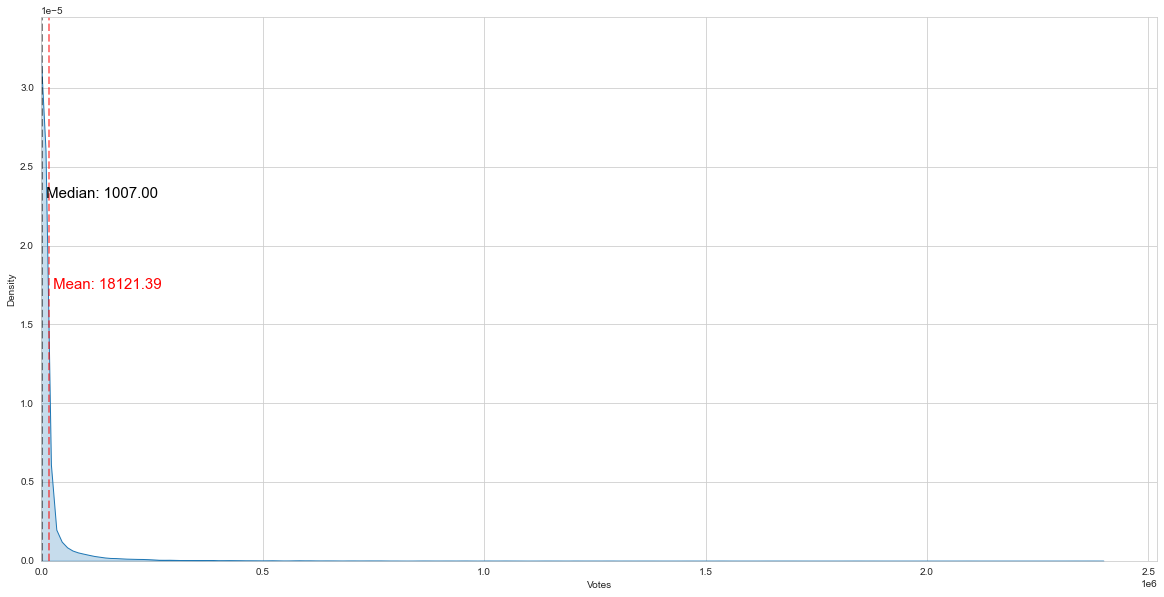

In [15]:
x_mean = film_to_votes["Votes"].mean()
x_median = film_to_votes["Votes"].median()

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

sns.kdeplot(film_to_votes["Votes"], shade=True)

plt.axvline(x_mean, color="red", linestyle="dashed", linewidth=2, alpha=0.5)
plt.text(x=x_mean, y=plt.ylim()[1]/2, s=" Mean: {:.2f}".format(x_mean), fontsize=15, color="red")
plt.axvline(x_median, color="black", linestyle="dashed", linewidth=2, alpha=0.5)
plt.text(x=x_median, y=plt.ylim()[1]/1.5, s=" Median: {:.2f}".format(x_median), fontsize=15, color="black")

plt.xlim(left=0)

#### Distribution of ratings

In [16]:
film_to_rating=df[["Film", "Rating"]].drop_duplicates()
film_to_rating

,Film,Rating
0,Ghost Story,6.3
1,The Purple Taxi,6.6
2,The Amazing Dobermans,5.3
3,The Towering Inferno,7.0
4,Midas Run,4.8
...,...,...
191842,The Running Actress,5.5
191843,The Treacherous,6.1
191848,Gunjan Saxena: The Kargil Girl,5.3
191849,Ghost Stories,4.3


(0.0, 10.161107029107672)

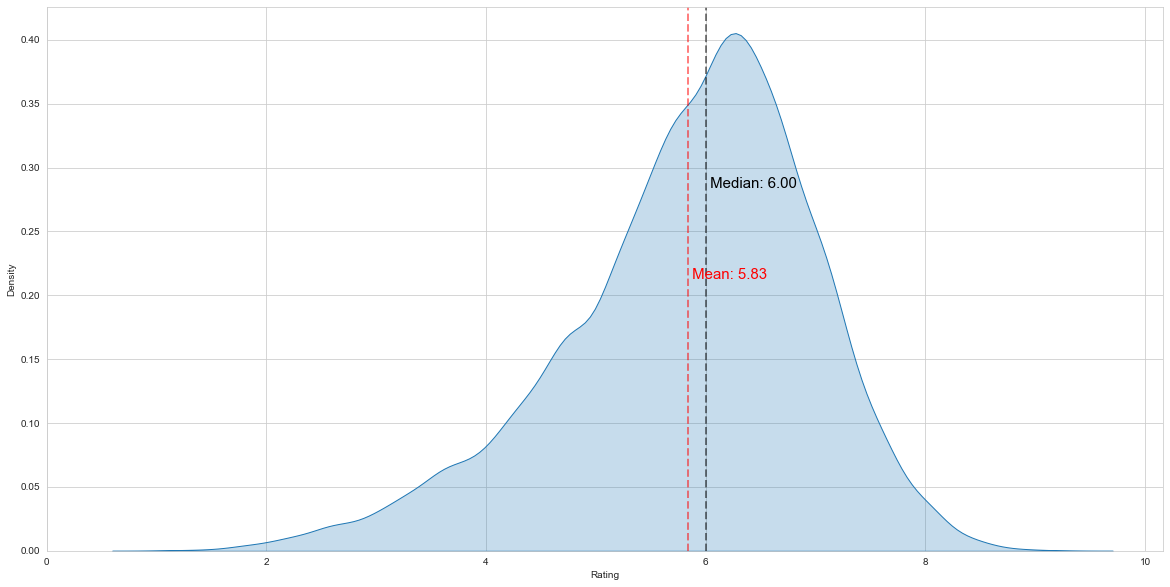

In [17]:
x_mean = film_to_rating["Rating"].mean()
x_median = film_to_rating["Rating"].median()

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

sns.kdeplot(film_to_rating["Rating"], shade=True)

plt.axvline(x_mean, color="red", linestyle="dashed", linewidth=2, alpha=0.5)
plt.text(x=x_mean, y=plt.ylim()[1]/2, s=" Mean: {:.2f}".format(x_mean), fontsize=15, color="red")
plt.axvline(x_median, color="black", linestyle="dashed", linewidth=2, alpha=0.5)
plt.text(x=x_median, y=plt.ylim()[1]/1.5, s=" Median: {:.2f}".format(x_median), fontsize=15, color="black")

plt.xlim(left=0)

#### Distribution of years

In [18]:
film_to_year=df[["Film", "Year"]].drop_duplicates()
film_to_year

,Film,Year
0,Ghost Story,1981
1,The Purple Taxi,1977
2,The Amazing Dobermans,1976
3,The Towering Inferno,1974
4,Midas Run,1969
...,...,...
191842,The Running Actress,2017
191843,The Treacherous,2015
191848,Gunjan Saxena: The Kargil Girl,2020
191849,Ghost Stories,2020


(1914.0, 2035.7580097123168)

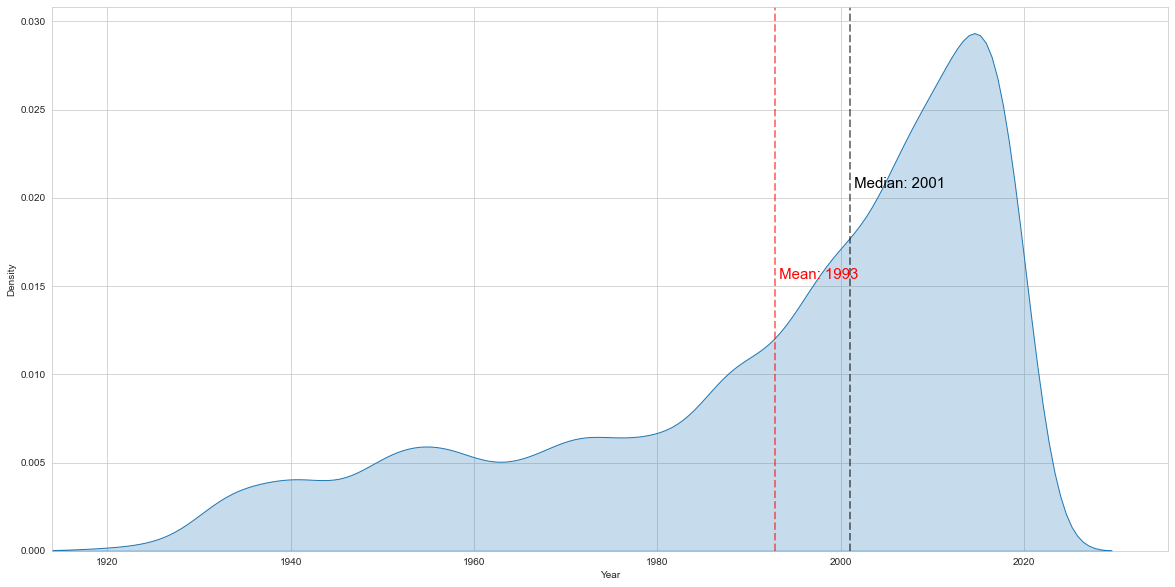

In [19]:
x_mean = film_to_year["Year"].mean()
x_median = film_to_year["Year"].median()

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

sns.kdeplot(film_to_year["Year"], shade=True)

plt.axvline(x_mean, color="red", linestyle="dashed", linewidth=2, alpha=0.5)
plt.text(x=x_mean, y=plt.ylim()[1]/2, s=" Mean: {:.0f}".format(x_mean), fontsize=15, color="red")
plt.axvline(x_median, color="black", linestyle="dashed", linewidth=2, alpha=0.5)
plt.text(x=x_median,y=plt.ylim()[1]/1.5, s=" Median: {:.0f}".format(x_median), fontsize=15, color="black")

plt.xlim(left=1914)

#### How votes affect the rating

In [20]:
votes_rating_year = df[["Votes", "Rating", "Year"]].drop_duplicates()
votes_rating_year

,Votes,Rating,Year
0,7731,6.3,1981
1,533,6.6,1977
2,369,5.3,1976
3,39888,7.0,1974
4,123,4.8,1969
...,...,...,...
191842,102,5.5,2017
191843,1195,6.1,2015
191848,24696,5.3,2020
191849,4485,4.3,2020


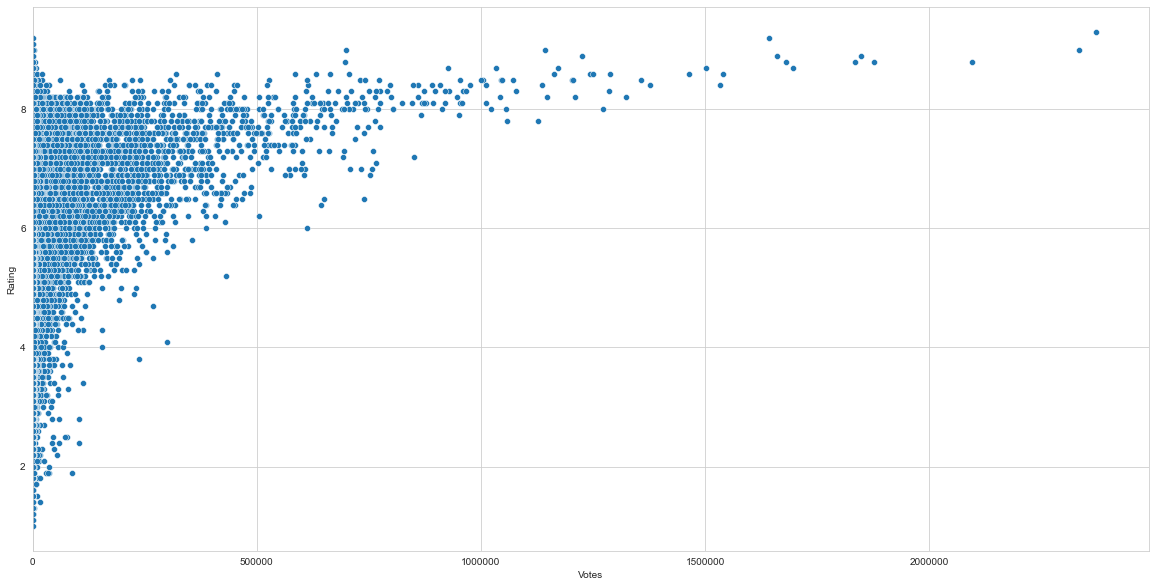

In [21]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

sns.scatterplot(x="Votes", y="Rating", data=votes_rating_year)

plt.xlim(left=0)
plt.ticklabel_format(style="plain")

Films with small number of votes have ratings all over the place, but from about 500000 votes we can see correlation. As seen on distribution of ratings median value of ratings is higher than mean. This means that people generally like to give film higher ratings.

#### Plotting for votes > 500000

In [22]:
votes_rating_year_500000 = votes_rating_year[votes_rating_year["Votes"] > 500000]
votes_rating_year_500000

,Votes,Rating,Year
173,527292,8.5,1942
272,612975,8.4,1979
275,1642278,9.2,1972
841,699843,9.0,1957
1175,959662,8.3,1983
...,...,...,...
113029,623956,8.2,2006
114000,709602,8.3,2001
114716,804135,8.0,2008
147185,585133,8.6,2019


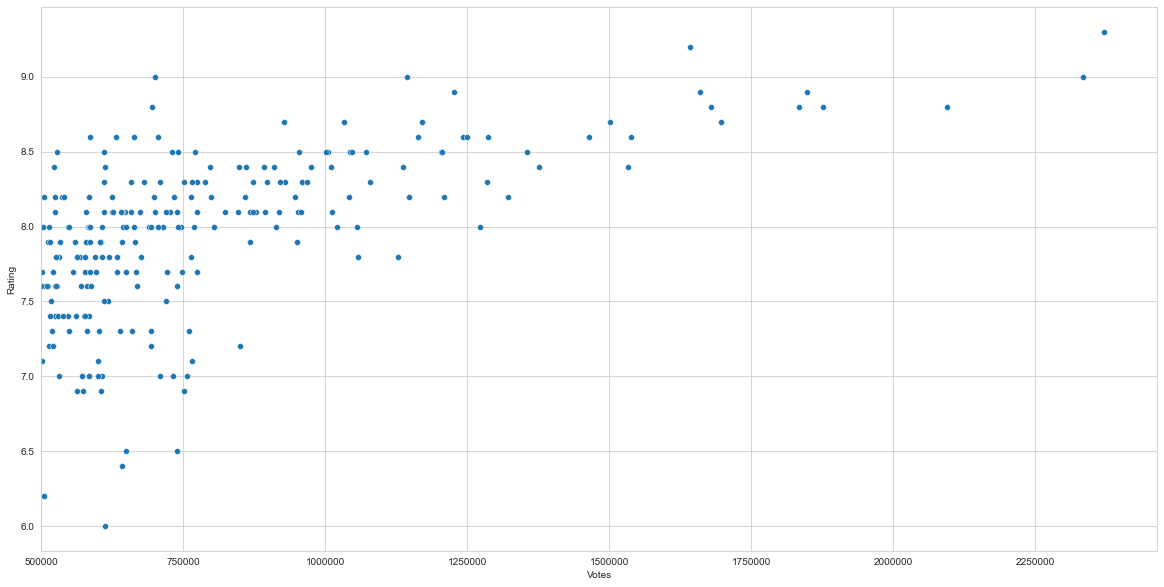

In [23]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

sns.scatterplot(x="Votes", y="Rating", data=votes_rating_year_500000)

plt.xlim(left=500000)
plt.ticklabel_format(style="plain")

#### Calculating correlation for both datasets

In [24]:
print('Correlation between nr of votes and rating: {}'.format(votes_rating_year["Votes"].corr(votes_rating_year["Rating"])))
print("Correlation between nr of votes and rating for over 5000000 votes: {}".format(votes_rating_year_500000["Votes"].corr(votes_rating_year_500000["Rating"])))

Correlation between nr of votes and rating: 0.2570381357154635
Correlation between nr of votes and rating for over 5000000 votes: 0.5967605734192921


#### Taking year into account for over 500000 votes

(500000.0, 2465112.25)

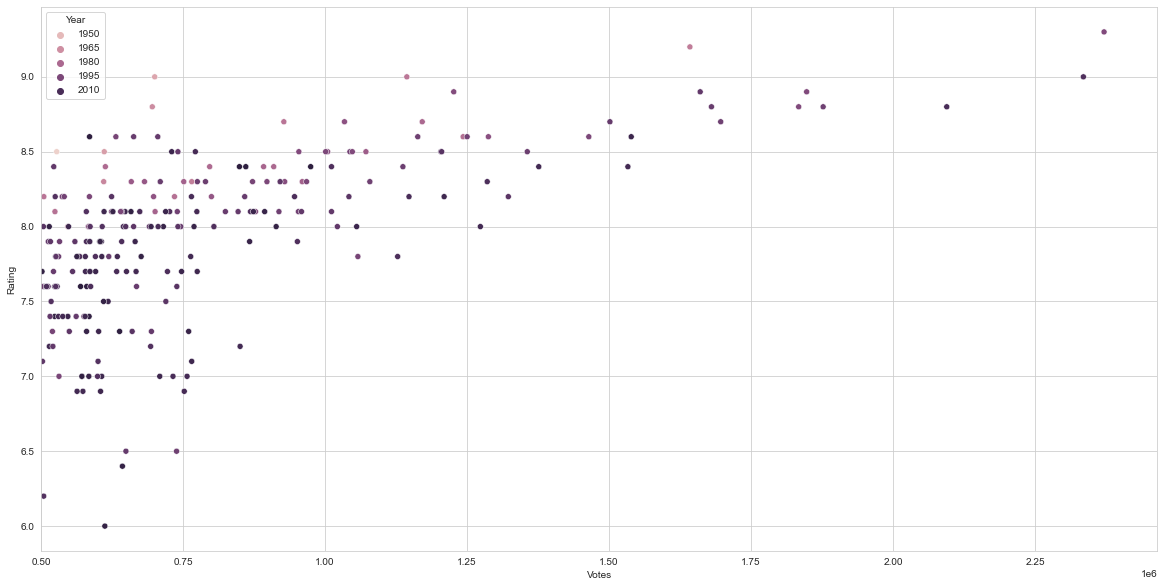

In [25]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

sns.scatterplot(x="Votes", y="Rating", data=votes_rating_year_500000, hue="Year")

plt.xlim(left=500000)

#### Relationship between year and votes

(1914.0, 2026.35)

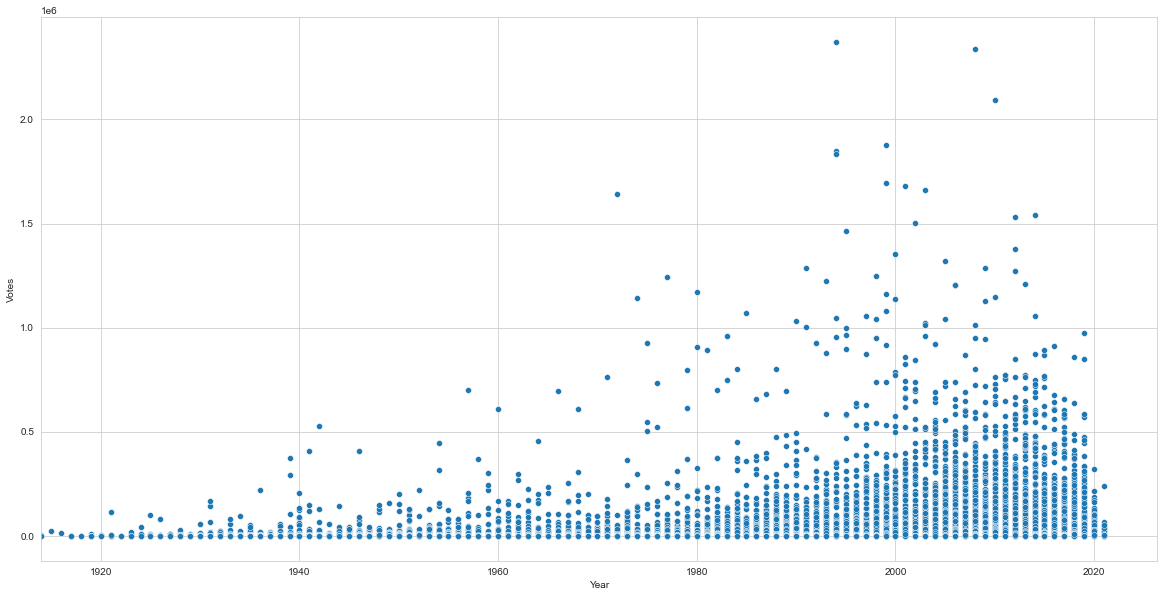

In [26]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

sns.scatterplot(x="Year", y="Votes", data=votes_rating_year)

plt.xlim(left=df["Year"].min())

In [27]:
print('Correlation between nr of votes and rating: {}'.format(votes_rating_year["Year"].corr(votes_rating_year["Votes"])))

Correlation between nr of votes and rating: 0.08969464871137453


There is no strong relationship between those features, but max number of votes tends to rise over the years

#### Relationship between year and rating

(1914.0, 2026.35)

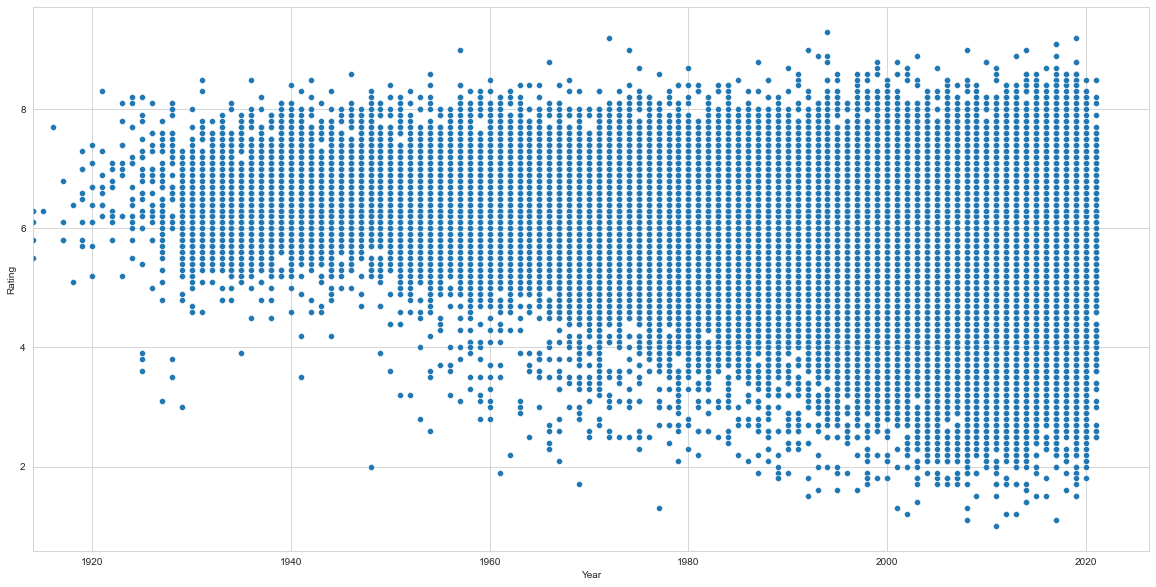

In [28]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

sns.scatterplot(x="Year", y="Rating", data=votes_rating_year)

plt.xlim(left=df["Year"].min())

Year and ratings have no effect on each other

In [29]:
print('Correlation between nr of votes and rating: {}'.format(votes_rating_year["Year"].corr(votes_rating_year["Rating"])))

Correlation between nr of votes and rating: -0.25218151070186756


## Exploratory Data Analysis

#### Actors with mean highest rating depending on minimum nr of votes

In [30]:
def mean_actor_ratings(data, min_nr_of_votes):
    return data[data["Votes"] > min_nr_of_votes].groupby("Actor")["Rating"].mean().sort_values(ascending=False).head(10)

#### Actors with mean highest rating if film has more than median of all votes

In [31]:
mean_actor_ratings(df, df["Votes"].median())

Actor
Simonetta Stefanelli        9.20
Morgana King                9.10
Ali Astin                   8.90
Michael Conner Humphreys    8.80
Ada Nicodemou               8.70
Joe Johnston                8.65
Yeo-jeong Cho               8.60
Christopher McQuarrie       8.50
Claudia Wells               8.50
John Cazale                 8.42
Name: Rating, dtype: float64

#### Actors with mean highest rating if film has more than 2 times std from mean votes

In [32]:
mean_actor_ratings(df, df["Votes"].mean()+2*df["Votes"].std())

Actor
Gil Bellows              9.3
Paul McCrane             9.3
David Proval             9.3
James Whitmore           9.3
Simonetta Stefanelli     9.2
Vito Scotti              9.2
Lenny Montana            9.2
Richard Conte            9.2
Richard S. Castellano    9.2
Alex Rocco               9.2
Name: Rating, dtype: float64

#### Actors with mean highest rating if film has more than 3 times std from mean votes

In [33]:
mean_actor_ratings(df, df["Votes"].mean()+3*df["Votes"].std())

Actor
Gil Bellows              9.3
James Whitmore           9.3
Tim Robbins              9.3
David Proval             9.3
Don McManus              9.3
Paul McCrane             9.3
Lenny Montana            9.2
Richard S. Castellano    9.2
Richard Conte            9.2
Al Lettieri              9.2
Name: Rating, dtype: float64

#### Films with highest rating if film has more than 3 times std from mean votes

In [34]:
film_high_rating=df[df["Votes"] > df["Votes"].mean()+3*df["Votes"].std()][["Film", "Votes", "Rating"]].drop_duplicates().sort_values(by="Rating",ascending=False).head(10)
film_high_rating

,Film,Votes,Rating
6285,The Shawshank Redemption,2371548,9.3
275,The Godfather,1642278,9.2
5523,The Godfather: Part II,1143820,9.0
841,12 Angry Men,699843,9.0
6253,The Dark Knight,2335143,9.0
10355,The Lord of the Rings: The Return of the King,1660358,8.9
4670,Pulp Fiction,1847827,8.9
6027,Schindler's List,1226408,8.9
3814,Fight Club,1876882,8.8
10357,The Lord of the Rings: The Fellowship of the Ring,1680215,8.8


#### Actors that starred in those films

In [35]:
actors_in_highest_rated_films=df[df["Film"].isin(film_high_rating["Film"])][["Actor", "Film"]].sort_values(by="Film")
actors_in_highest_rated_films

,Actor,Film
841,Henry Fonda,12 Angry Men
47438,Jack Klugman,12 Angry Men
31126,Martin Balsam,12 Angry Men
99417,John Fiedler,12 Angry Men
155418,Jack Warden,12 Angry Men
...,...,...
6285,Morgan Freeman,The Shawshank Redemption
94294,Jeffrey DeMunn,The Shawshank Redemption
72158,Paul McCrane,The Shawshank Redemption
55729,Mark Rolston,The Shawshank Redemption


#### Are there actors who starred in more than one film from this list?

In [36]:
actor_appearances_count=actors_in_highest_rated_films["Actor"].value_counts().to_frame("Count").reset_index().rename(columns={"index": "Actor"})
actor_appearances_count

,Actor,Count
0,Ian Holm,2
1,Hugo Weaving,2
2,Viggo Mortensen,2
3,Ian McKellen,2
4,Elijah Wood,2
...,...,...
135,Embeth Davidtz,1
136,Caroline Goodall,1
137,Mark Ivanir,1
138,Ralph Fiennes,1


In [37]:
actor_with_more_than_one_appearance=actor_appearances_count[actor_appearances_count["Count"] > 1]
actor_with_more_than_one_appearance

,Actor,Count
0,Ian Holm,2
1,Hugo Weaving,2
2,Viggo Mortensen,2
3,Ian McKellen,2
4,Elijah Wood,2
5,Christopher Lee,2
6,Sean Astin,2
7,Dominic Monaghan,2
8,Craig Parker,2
9,Bret McKenzie,2


Most of these actors appeared in either Godfather or Lord of the Rings Films, because there are 2 films of each series  on the list

In [38]:
actor_film_pivot=pd.pivot_table(actors_in_highest_rated_films, index="Actor", values="Film", aggfunc=lambda x: list(x))
actor_film_pivot

,Film
Actor,
Aaron Eckhart,[The Dark Knight]
Abe Vigoda,"[The Godfather, The Godfather: Part II]"
Al Lettieri,[The Godfather]
Al Pacino,"[The Godfather, The Godfather: Part II]"
Alex Rocco,[The Godfather]
...,...
Viggo Mortensen,[The Lord of the Rings: The Fellowship of the ...
Ving Rhames,[Pulp Fiction]
Vito Scotti,[The Godfather]


Grabbing actors that appeared in more than one film

In [39]:
actor_film_pivot_two_appearances=actor_film_pivot[actor_film_pivot.index.isin(actor_with_more_than_one_appearance["Actor"])].sort_index()
actor_film_pivot_two_appearances

,Film
Actor,
Abe Vigoda,"[The Godfather, The Godfather: Part II]"
Al Pacino,"[The Godfather, The Godfather: Part II]"
Andy Serkis,[The Lord of the Rings: The Fellowship of the ...
Billy Boyd,[The Lord of the Rings: The Fellowship of the ...
Bret McKenzie,[The Lord of the Rings: The Fellowship of the ...
Cate Blanchett,[The Lord of the Rings: The Fellowship of the ...
Christopher Lee,[The Lord of the Rings: The Fellowship of the ...
Craig Parker,[The Lord of the Rings: The Fellowship of the ...
Diane Keaton,"[The Godfather, The Godfather: Part II]"


Morgan Freeman is the only actor who appeared in two films that are neither Godfather nor Lord of the Rings

#### Film to cast

In [40]:
cast_to_film=pd.pivot_table(df, index="Film", values="Actor", aggfunc=lambda x: list(x))
cast_to_film

,Actor
Film,
"!Ay, mi madre!",[Paz Vega]
!Hay motivo!,"[Luis Tosar, Marta Etura]"
!Three Amigos!,"[Steve Martin, Chevy Chase, Jon Lovitz, Joe Ma..."
#Alive,[Park Shin-Hye]
#Horror,"[Timothy Hutton, Balthazar Getty, Chloe Sevign..."
...,...
s/y Gladjen,"[Lena Olin, Stellan Skarsgard]"
sxtape,[Chris Coy]
xXx,"[Samuel L. Jackson, Asia Argento, Thomas Ian G..."


#### With which another actor each actor appeared most times

In [41]:
def actor_to_accompanying_actor(data, actor):
    #finding films in which actor starred
    film_to_actor = data[data["Actor"] == actor]["Film"]
    #finding actors who played in those films (excluding our actor)
    actors_in_films = data[data["Film"].isin(film_to_actor) & (data["Actor"] != actor)]
    #counting how many films they played together and returning first actor
    return actors_in_films["Actor"].value_counts().head(1).reset_index().rename(columns={"index":"Accompanying Actor", "Actor": "Number of films together"})

To test function let's see with whom Morgan Freeman played most films together

In [42]:
actor_to_accompanying_actor(df, "Morgan Freeman")

,Accompanying Actor,Number of films together
0,Michael Caine,6


Let's see with whom actors from precious list played most films

In [43]:
actor_with_more_than_one_appearance

,Actor,Count
0,Ian Holm,2
1,Hugo Weaving,2
2,Viggo Mortensen,2
3,Ian McKellen,2
4,Elijah Wood,2
5,Christopher Lee,2
6,Sean Astin,2
7,Dominic Monaghan,2
8,Craig Parker,2
9,Bret McKenzie,2


#### Function that returns data frame of actor, accompanying actor and films together

In [44]:
def accompanying_actors(data, actors_list):
    #finding accompanying actors and nr of films together
    frames = [actor_to_accompanying_actor(data, actor) for actor in actors_list]

    #concatenating list of dataframes
    accompanying_actors = pd.concat(frames, ignore_index=True)
    #concatenating actors with accompanying actors
    return pd.concat([actors_list, accompanying_actors], axis=1)

In [49]:
actors_to_accompanying_actors_count=accompanying_actors(df, actor_with_more_than_one_appearance["Actor"])
actors_to_accompanying_actors_count.sort_values(by="Number of films together", ascending=False)

,Actor,Accompanying Actor,Number of films together
5,Christopher Lee,Peter Cushing,23
1,Hugo Weaving,Cate Blanchett,7
16,Diane Keaton,Woody Allen,7
20,Peter Jackson,Cate Blanchett,7
27,Talia Shire,Burt Young,7
19,James Caan,Burt Young,7
23,Cate Blanchett,Peter Jackson,7
3,Ian McKellen,Hugh Jackman,6
4,Elijah Wood,Hugo Weaving,6
28,Morgan Freeman,Michael Caine,6


#### Christopher Lee and Peter Cushing starred together in huge number of films, let's what are those films

In [46]:
c_lee_films = df[df["Actor"] == "Christopher Lee"][["Film", "Year", "Votes", "Rating"]]
p_cushing_films = df[df["Actor"] == "Peter Cushing"][["Film", "Year", "Votes", "Rating"]]

lee_cushing_together=pd.merge(c_lee_films, p_cushing_films, how="inner", on=["Film", "Year", "Votes", "Rating"])
lee_cushing_together

,Film,Year,Votes,Rating
0,House of the Long Shadows,1983,3160,6.3
1,Arabian Adventure,1979,889,5.8
2,The Satanic Rites of Dracula,1973,5447,5.6
3,The Creeping Flesh,1973,3238,6.3
4,Nothing But the Night,1973,1493,5.5
5,Horror Express,1972,9393,6.6
6,Dracula A.D. 1972,1972,5783,6.0
7,The House That Dripped Blood,1971,5558,6.6
8,"I, Monster",1971,1282,5.8
9,Scream and Scream Again,1970,3453,5.6


Most of those films are Hammer Horror Films or other british horror films from that era